# Preprocess Transaction

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing

# Read Dataset

In [2]:
%time train = pd.read_csv('./datasets/train_transaction.csv')

CPU times: user 21.6 s, sys: 2.6 s, total: 24.2 s
Wall time: 26.2 s


In [37]:
train.shape

(590540, 394)

# Check NAN

In [3]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
nan_sum = train.isnull().sum()

In [9]:
nan_sum[:12]

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
card2              8933
card3              1565
card4              1577
card5              4259
card6              1571
addr1             65706
dtype: int64

In [11]:
train.iloc[:5, 5:11]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


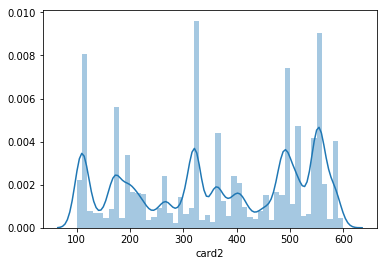

In [14]:
sns.distplot(train['card2'].dropna())

# Check whether there is negative cells

In [45]:
summary = []

for col in train.columns:
    col_type = train[col].dtype
    if col_type != object:
        
        summary.append([col, min(train[col].dropna())])
#         print('{} ({}): {}'.format(col, 
#                                    col_type,
#                                   min(train[col].dropna())))

In [47]:
min_value = 999

for s in summary:
    if s[1] < min_value:
        min_value = s[1]
        
        
print(min_value)

-193.0


### Observation
Min value of train dataset is -193

# Check number of string features

In [115]:
train.dtypes[:10]

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
dtype: object

In [119]:
type(train.dtypes[0])

numpy.dtype

In [124]:
train.dtypes[0] is np.dtype('int64')

True

In [129]:
train.dtypes[4] is np.dtype('object')

True

In [130]:
sum([dtype is np.dtype('object') for dtype in train.dtypes])

14

### Observation
There are 14 string features.

# Show features with object type

In [135]:
object_features = []

for col in train.columns:
    if train[col].dtype is np.dtype('object'):
        object_features.append(col)
        
train[object_features].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
for f in object_features:
    print('{}: {}'.format(f, train[f].unique()))

ProductCD: ['W' 'H' 'C' 'S' 'R']
card4: ['discover' 'mastercard' 'visa' 'american express' nan]
card6: ['credit' 'debit' nan 'debit or credit' 'charge card']
P_emaildomain: [nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'sc.rr.com' 'ptd.net'
 'live.fr' 'yahoo.co.uk' 'hotmail.fr' 'hotmail.de' 'hotmail.co.uk'
 'protonmail.com' 'yahoo.co.jp']
R_emaildomain: [nan 'gmail.com

### Observation
- card6 has ```'debit or credit'```.
- P_emaildomain and R_emaildomain have overlapping labels like 'aol.com' or 'gmail.com'. They should be encoded together.

# Label Encoding

In [22]:
series = train['card4']

label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(series[series.notnull()])

LabelEncoder()

In [23]:
label_encoder.classes_

array(['american express', 'discover', 'mastercard', 'visa'], dtype=object)

In [24]:
label_encoder.transform(series.head())

array([1, 2, 3, 2, 2])

In [25]:
series.head()

0      discover
1    mastercard
2          visa
3    mastercard
4    mastercard
Name: card4, dtype: object

In [26]:
series[9686:9686+5]

9686           NaN
9687    mastercard
9688    mastercard
9689          visa
9690          visa
Name: card4, dtype: object

In [27]:
train['transform'] = pd.Series(label_encoder.transform(series[series.notnull()]),
                                 index=series[series.notnull()].index)

In [96]:
train['transform'].shape

(590540,)

In [99]:
train['transform'][9686:9686+5]

9686    NaN
9687    2.0
9688    2.0
9689    3.0
9690    3.0
Name: transform, dtype: float64

# Encode using Unique Values

In [65]:
series.unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [85]:
series_encoded = series.replace({'discover':1, 
                                 'mastercard': 2, 
                                 'visa':3, 
                                 'american express': 4})

In [86]:
series_encoded[9686:9686+5]

9686    NaN
9687    2.0
9688    2.0
9689    3.0
9690    3.0
Name: card4, dtype: float64

In [84]:
series_encoded.astype('category').memory_usage()

590812

In [75]:
series_encoded.shape

(590540,)

In [81]:
series_encoded.astype('category')[9686:9686+5]

9686     NaN
9687       2
9688       2
9689    visa
9690    visa
Name: card4, dtype: category
Categories (4, object): [1, 2, 4, visa]

In [91]:
series.astype('category').cat.codes[9686:9686+5]

9686   -1
9687    2
9688    2
9689    3
9690    3
dtype: int8

In [98]:
series[-10:]

590530    mastercard
590531          visa
590532    mastercard
590533          visa
590534    mastercard
590535          visa
590536    mastercard
590537    mastercard
590538    mastercard
590539    mastercard
Name: card4, dtype: object

# Encode 

In [39]:
import pdb

def gen_encoder(series, encode_nan=False):
    """
    Args:
        series (pandas.Series):
        
    Return:
        encoder (sklearn.preprocessing.LabelEncoder):
    """
    
    encoder = preprocessing.LabelEncoder()
    
    if encode_nan:
        encoder.fit(series)
    else:
        encoder.fit(series[series.notnull()])
    
    return encoder


def get_string_features(df):
    """
    Args:
        df (pandas.DataFrame):
    
    Return:
        string_features (list of str):
    """
    string_features = []
    
    for col in df.columns:
        if df[col].dtype is np.dtype('object'):
            string_features.append(col)
            
    return string_features
    

def generate_encoders(df, feature_names):
    encoder_dict = {}
    
    # fit 
    for feature in feature_names:
        
        # P_emaildomain and R_emaildomain needs to be encoded together.
        if feature is not 'P_emaildomain' and \
            feature is not 'R_emaildomain':
            
#             pdb.set_trace()
            
            # encode labels
            encoder = gen_encoder(df[feature], encode_nan=False)
            
            # record encoder
            encoder_dict[feature] = encoder
    
    
    # Combine P_emaildomain and R_emaildomain
    encoder = gen_encoder(pd.concat([df['P_emaildomain'], df['R_emaildomain']],ignore_index=True),
                         encode_nan=False)
    
    encoder_dict['P_emaildomain'] = encoder
    encoder_dict['R_emaildomain'] = encoder
    
    return encoder_dict
    

def encode_feature(series, encoder):
    """
    Args:
        series (pandas.Series):
        encoder (sklearn.preprocessing.LabelEncoder):
    
    Return:
        series_encoded (pandas.Series):
    """
    
    return pd.Series(
                    encoder.transform(series[series.notnull()]),
                    index=series[series.notnull()].index)


def encode_string_features(df, encoder_dict):
    """
    Args:
        df (pandas.DataFrame):
        encoder_dict (dict): encoders w.r.t. string features.
    """
    
    for feature, encoder in encoder_dict.items():
        # get encoder
        encoder = encoder_dict[feature]

        # Start encoding
        new_feature = '{}_encoded'.format(feature)
        df[new_feature] = encode_feature(df[feature], encoder)
            

In [29]:
feature_names = get_string_features(train)
print(feature_names)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [33]:
encoder_dict = generate_encoders(train, feature_names)


In [35]:
for feature, encoder in encoder_dict.items():
    print(feature)
    print(encoder.classes_)

ProductCD
['C' 'H' 'R' 'S' 'W']
card4
['american express' 'discover' 'mastercard' 'visa']
card6
['charge card' 'credit' 'debit' 'debit or credit']
P_emaildomain
['aim.com' 'anonymous.com' 'aol.com' 'att.net' 'bellsouth.net'
 'cableone.net' 'centurylink.net' 'cfl.rr.com' 'charter.net' 'comcast.net'
 'cox.net' 'earthlink.net' 'embarqmail.com' 'frontier.com'
 'frontiernet.net' 'gmail' 'gmail.com' 'gmx.de' 'hotmail.co.uk'
 'hotmail.com' 'hotmail.de' 'hotmail.es' 'hotmail.fr' 'icloud.com'
 'juno.com' 'live.com' 'live.com.mx' 'live.fr' 'mac.com' 'mail.com'
 'me.com' 'msn.com' 'netzero.com' 'netzero.net' 'optonline.net'
 'outlook.com' 'outlook.es' 'prodigy.net.mx' 'protonmail.com' 'ptd.net'
 'q.com' 'roadrunner.com' 'rocketmail.com' 'sbcglobal.net' 'sc.rr.com'
 'scranton.edu' 'servicios-ta.com' 'suddenlink.net' 'twc.com'
 'verizon.net' 'web.de' 'windstream.net' 'yahoo.co.jp' 'yahoo.co.uk'
 'yahoo.com' 'yahoo.com.mx' 'yahoo.de' 'yahoo.es' 'yahoo.fr' 'ymail.com']
R_emaildomain
['aim.com' 'anony

In [40]:
%time encode_string_features(train, encoder_dict)

{'ProductCD': LabelEncoder(),
 'card4': LabelEncoder(),
 'card6': LabelEncoder(),
 'P_emaildomain': LabelEncoder(),
 'R_emaildomain': LabelEncoder(),
 'M1': LabelEncoder(),
 'M2': LabelEncoder(),
 'M3': LabelEncoder(),
 'M4': LabelEncoder(),
 'M5': LabelEncoder(),
 'M6': LabelEncoder(),
 'M7': LabelEncoder(),
 'M8': LabelEncoder(),
 'M9': LabelEncoder()}

In [41]:
# feature_names = get_string_features(train)
# encoder_dict = generate_encoders(train, feature_names)
# encode_string_features(train, encoder_dict)

In [42]:
train.shape

(590540, 409)

In [43]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,R_emaildomain_encoded,M1_encoded,M2_encoded,M3_encoded,M4_encoded,M5_encoded,M6_encoded,M7_encoded,M8_encoded,M9_encoded
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,1.0,1.0,1.0,2.0,0.0,1.0,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
train.iloc[:5, -14:]

,ProductCD_encoded,card4_encoded,card6_encoded,P_emaildomain_encoded,R_emaildomain_encoded,M1_encoded,M2_encoded,M3_encoded,M4_encoded,M5_encoded,M6_encoded,M7_encoded,M8_encoded,M9_encoded
0,4,1.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0,0.0,1.0,NaN,NaN,NaN
1,4,2.0,1.0,16.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN
2,4,3.0,2.0,35.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2.0,2.0,54.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN
4,1,2.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
train[['ProductCD', 'ProductCD_encoded']].head()

,ProductCD,ProductCD_encoded
0,W,4
1,W,4
2,W,4
3,W,4
4,H,1


In [49]:
encoder_dict['ProductCD'].classes_

array(['C', 'H', 'R', 'S', 'W'], dtype=object)

In [56]:
for feature, encoder in encoder_dict.items():
    features = [feature, '{}_encoded'.format(feature)]
    print(train[features].head())
    
    print()
    
    print(encoder.classes_)
    print()
    

  ProductCD  ProductCD_encoded
0         W                  4
1         W                  4
2         W                  4
3         W                  4
4         H                  1

['C' 'H' 'R' 'S' 'W']

        card4  card4_encoded
0    discover            1.0
1  mastercard            2.0
2        visa            3.0
3  mastercard            2.0
4  mastercard            2.0

['american express' 'discover' 'mastercard' 'visa']

    card6  card6_encoded
0  credit            1.0
1  credit            1.0
2   debit            2.0
3   debit            2.0
4  credit            1.0

['charge card' 'credit' 'debit' 'debit or credit']

  P_emaildomain  P_emaildomain_encoded
0           NaN                    NaN
1     gmail.com                   16.0
2   outlook.com                   35.0
3     yahoo.com                   54.0
4     gmail.com                   16.0

['aim.com' 'anonymous.com' 'aol.com' 'att.net' 'bellsouth.net'
 'cableone.net' 'centurylink.net' 'cfl.rr.com' 'charter.net' 